<a href="https://colab.research.google.com/github/7Blessings7/Final-Project-CMS204/blob/main/Pair_22_Code_Halim_Raymond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install modules
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Singapore train lines and stations

# Format: Station1,Station2,TravelTimeInMinutes,Line
train_links = [
    # East West Line
    "Pasir Ris,Tampines,6,East West",
    "Tampines,Simei,3,East West",
    "Simei,Tanah Merah,4,East West",
    "Tanah Merah,Bedok,4,East West",
    "Bedok,Kembangan,4,East West",
    "Kembangan,Eunos,3,East West",
    "Eunos,Paya Lebar,3,East West",
    "Paya Lebar,Aljunied,3,East West",
    "Aljunied,Kallang,3,East West",
    "Kallang,Lavender,3,East West",
    "Lavender,Bugis,3,East West",
    "Bugis,City Hall,3,East West",
    "City Hall,Raffles Place,3,East West",
    "Raffles Place,Tanjong Pagar,3,East West",
    "Tanjong Pagar,Outram Park,3,East West",
    "Outram Park,Tiong Bahru,3,East West",
    "Tiong Bahru,Redhill,3,East West",
    "Redhill,Queenstown,3,East West",
    "Queenstown,Commonwealth,3,East West",
    "Commonwealth,Buona Vista,3,East West",
    "Buona Vista,Dover,3,East West",
    "Dover,Clementi,3,East West",
    "Clementi,Jurong East,5,East West",
    "Jurong East,Chinese Garden,3,East West",
    "Chinese Garden,Lakeside,3,East West",
    "Lakeside,Boon Lay,3,East West",
    "Boon Lay,Pioneer,3,East West",
    "Pioneer,Joo Koon,4,East West",
    "Joo Koon,Gul Circle,4,East West",
    "Gul Circle,Tuas Crescent,3,East West",
    "Tuas Crescent,Tuas West Road,3,East West",
    "Tuas West Road,Tuas Link,3,East West",
    "Tanah Merah,Expo,3,East West",
    "Expo,Changi Airport,6,East West",

    # North South Line
    "Jurong East,Bukit Batok,5,North South",
    "Bukit Batok,Bukit Gombak,3,North South",
    "Bukit Gombak,Choa Chu Kang,4,North South",
    "Choa Chu Kang,Yew Tee,3,North South",
    "Yew Tee,Kranji,5,North South",
    "Kranji,Marsiling,3,North South",
    "Marsiling,Woodlands,3,North South",
    "Woodlands,Admiralty,3,North South",
    "Admiralty,Sembawang,4,North South",
    "Sembawang,Canberra,3,North South",
    "Canberra,Yishun,3,North South",
    "Yishun,Khatib,3,North South",
    "Khatib,Yio Chu Kang,6,North South",
    "Yio Chu Kang,Ang Mo Kio,3,North South",
    "Ang Mo Kio,Bishan,4,North South",
    "Bishan,Braddell,3,North South",
    "Braddell,Toa Payoh,3,North South",
    "Toa Payoh,Novena,3,North South",
    "Novena,Newton,3,North South",
    "Newton,Orchard,3,North South",
    "Orchard,Somerset,3,North South",
    "Somerset,Dhoby Ghaut,2,North South",
    "Dhoby Ghaut,City Hall,3,North South",
    "Raffles Place,Marina Bay,3,North South",
    "Marina Bay,Marina South Pier,3,North South",

    # North East Line
    "HarbourFront,Outram Park,4,North East",
    "Outram Park,Chinatown,1,North East",
    "Chinatown,Clarke Quay,2,North East",
    "Clarke Quay,Dhoby Ghaut,3,North East",
    "Dhoby Ghaut,Little India,1,North East",
    "Little India,Farrer Park,1,North East",
    "Farrer Park,Boon Keng,2,North East",
    "Boon Keng,Potong Pasir,3,North East",
    "Potong Pasir,Woodleigh,1,North East",
    "Woodleigh,Serangoon,2,North East",
    "Serangoon,Kovan,3,North East",
    "Kovan,Hougang,2,North East",
    "Hougang,Buangkok,2,North East",
    "Buangkok,Sengkang,2,North East",
    "Sengkang,Punggol,3,North East",

    # Circle Line
    "Dhoby Ghaut,Bras Basah,2,Circle",
    "Bras Basah,Esplanade,2,Circle",
    "Esplanade,Promenade,3,Circle",
    "Promenade,Nicoll Highway,3,Circle",
    "Nicoll Highway,Stadium,3,Circle",
    "Stadium,Mountbatten,2,Circle",
    "Mountbatten,Dakota,2,Circle",
    "Dakota,Paya Lebar,3,Circle",
    "Paya Lebar,MacPherson,3,Circle",
    "MacPherson,Tai Seng,3,Circle",
    "Tai Seng,Bartley,3,Circle",
    "Bartley,Serangoon,3,Circle",
    "Serangoon,Lorong Chuan,3,Circle",
    "Lorong Chuan,Bishan,3,Circle",
    "Bishan,Marymount,3,Circle",
    "Marymount,Caldecott,3,Circle",
    "Caldecott,Botanic Gardens,5,Circle",
    "Botanic Gardens,Farrer Road,3,Circle",
    "Farrer Road,Holland Village,3,Circle",
    "Holland Village,Buona Vista,2,Circle",
    "Buona Vista,one-north,3,Circle",
    "one-north,Kent Ridge,2,Circle",
    "Kent Ridge,Haw Par Villa,3,Circle",
    "Haw Par Villa,Pasir Panjang,3,Circle",
    "Pasir Panjang,Labrador Park,2,Circle",
    "Labrador Park,Telok Blangah,2,Circle",
    "Telok Blangah,HarbourFront,3,Circle",
    "Promenade,Bayfront,3,Circle",
    "Bayfront,Marina Bay,3,Circle",

    # Downtown Line
    "Bukit Panjang,Cashew,2,Downtown",
    "Cashew,Hillview,2,Downtown",
    "Hillview,Beauty World,3,Downtown",
    "Beauty World,King Albert Park,2,Downtown",
    "King Albert Park,Sixth Avenue,2,Downtown",
    "Sixth Avenue,Tan Kah Kee,2,Downtown",
    "Tan Kah Kee,Botanic Gardens,2,Downtown",
    "Botanic Gardens,Stevens,2,Downtown",
    "Stevens,Newton,2,Downtown",
    "Newton,Little India,3,Downtown",
    "Little India,Rochor,1,Downtown",
    "Rochor,Bugis,2,Downtown",
    "Bugis,Promenade,2,Downtown",
    "Bayfront,Downtown,2,Downtown",
    "Downtown,Telok Ayer,1,Downtown",
    "Telok Ayer,Chinatown,2,Downtown",
    "Chinatown,Fort Canning,2,Downtown",
    "Fort Canning,Bencoolen,2,Downtown",
    "Bencoolen,Jalan Besar,1,Downtown",
    "Jalan Besar,Bendemeer,2,Downtown",
    "Bendemeer,Geylang Bahru,2,Downtown",
    "Geylang Bahru,Mattar,2,Downtown",
    "Mattar,MacPherson,2,Downtown",
    "MacPherson,Ubi,2,Downtown",
    "Ubi,Kaki Bukit,2,Downtown",
    "Kaki Bukit,Bedok North,2,Downtown",
    "Bedok North,Bedok Reservoir,2,Downtown",
    "Bedok Reservoir,Tampines West,3,Downtown",
    "Tampines West,Tampines,2,Downtown",
    "Tampines,Tampines East,2,Downtown",
    "Tampines East,Upper Changi,3,Downtown",
    "Upper Changi,Expo,2,Downtown"
]

# Train line colors
line_colors = {
    'East West': '#3b8a41',
    'North South': '#da3731',
    'North East': '#9236ad',
    'Circle': '#f4a240',
    'Downtown': '#1955ac',
}

# Train line colors (ansi)
line_colors_ansi = {
    '#3b8a41': '\033[38;5;65m',
    '#da3731': '\033[38;5;167m',
    '#9236ad': '\033[38;5;97m',
    '#f4a240': '\033[38;5;215m',
    '#1955ac': '\033[38;5;25m'
}

# Station positions
station_positions = {
    # East West Line
    'Tuas Link': [0, 15],
    'Tuas West Road': [0, 14],
    'Tuas Crescent': [0, 13],
    'Gul Circle': [0, 12],
    'Joo Koon': [0, 11],
    'Pioneer': [0, 10],
    'Boon Lay': [0, 9],
    'Lakeside': [1, 8],
    'Chinese Garden': [2, 8],
    'Jurong East': [3, 8],
    'Clementi': [4, 8],
    'Dover': [5, 8],
    'Buona Vista': [6, 8],
    'Commonwealth': [7, 7],
    'Queenstown': [8, 6],
    'Redhill': [9, 5],
    'Tiong Bahru': [10, 4],
    'Outram Park': [11, 3],
    'Tanjong Pagar': [13, 1],
    'Raffles Place': [15, 2],
    'City Hall': [15, 3],
    'Bugis': [17, 5],
    'Lavender': [18, 6],
    'Kallang': [19, 7],
    'Aljunied': [20, 8],
    'Paya Lebar': [21, 9],
    'Eunos': [22, 10],
    'Kembangan': [23, 11],
    'Bedok': [24, 12],
    'Tanah Merah': [26, 12],
    'Simei': [26, 13],
    'Tampines': [26, 14],
    'Pasir Ris': [26, 15],
    'Expo': [27, 11],
    'Changi Airport': [28, 11],

    # Downtown Line
    'Upper Changi': [27, 12],
    'Tampines East': [27, 13],
    'Tampines West': [25, 14],
    'Bedok Reservoir': [24, 14],
    'Bedok North': [24, 14],
    'Kaki Bukit': [23, 13],
    'Ubi': [22, 12],
    'MacPherson': [21, 11],
    'Mattar': [20, 10],
    'Geylang Bahru': [19, 9],
    'Bendemeer': [18, 8],
    'Jalan Besar': [17, 7],
    'Bencoolen': [16, 6],
    'Fort Canning': [12, 6],
    'Chinatown': [12, 5],
    'Telok Ayer': [14, 2],
    'Downtown': [16, 0],
    'Bayfront': [17, 0],
    'Promenade': [19, 2],
    'Rochor': [15, 8],
    'Little India': [14, 9],
    'Newton': [12, 11],
    'Stevens': [10, 12],
    'Botanic Gardens': [8, 12],
    'Tan Kah Kee': [7, 12],
    'Sixth Avenue': [6, 13],
    'King Albert Park': [6, 14],
    'Beauty World': [6, 15],
    'Hillview': [6, 16],
    'Cashew': [6, 17],
    'Bukit Panjang': [6, 18],

    # North South Line
    'Bukit Batok': [3, 10],
    'Bukit Gombak': [3, 12],
    'Choa Chu Kang': [3, 14],
    'Yew Tee': [3, 16],
    'Kranji': [3, 18],
    'Marsiling': [5, 20],
    'Woodlands': [7, 20],
    'Admiralty': [8, 20],
    'Sembawang': [9, 20],
    'Canberra': [10, 20],
    'Yishun': [12, 20],
    'Khatib': [13, 19],
    'Yio Chu Kang': [14, 17],
    'Ang Mo Kio': [14, 16],
    'Bishan': [14, 15],
    'Braddell': [14, 14],
    'Toa Payoh': [14, 13],
    'Novena': [13, 12],
    'Orchard': [11, 10],
    'Somerset': [13, 8],
    'Dhoby Ghaut': [14, 7],
    'Marina Bay': [15, 0],
    'Marina South Pier': [16, -1],

    # North East Line
    'HarbourFront': [11, -1],
    'Clarke Quay': [13, 6],
    'Farrer Park': [14, 10],
    'Boon Keng': [14, 11],
    'Potong Pasir': [15, 12],
    'Woodleigh': [16, 13],
    'Serangoon': [17, 14],
    'Kovan': [18, 15],
    'Hougang': [19, 16],
    'Buangkok': [20, 17],
    'Sengkang': [21, 18],
    'Punggol': [23, 20],

    # Circle Line
    'Bras Basah': [15, 5],
    'Esplanade': [17, 2],
    'Nicoll Highway': [20, 3],
    'Stadium': [21, 5],
    'Mountbatten': [21, 6],
    'Dakota': [21, 7],
    'Tai Seng': [20, 12],
    'Bartley': [19, 13],
    'Lorong Chuan': [15, 15],
    'Caldecott': [10, 14],
    'Marymount': [12, 15],
    'Farrer Road': [7, 11],
    'Holland Village': [6, 9],
    'one-north': [6, 7],
    'Kent Ridge': [6, 6],
    'Haw Par Villa': [6, 4],
    'Pasir Panjang': [7, 2],
    'Labrador Park': [8, 1],
    'Telok Blangah': [9, 0]
}

In [ ]:
import csv
from collections import defaultdict
import networkx as nx
from matplotlib import pyplot as plt

class SGTrainRouteGraph:
  """
  A class used to represent Singapore train route graph
  """

  def __init__(self):
    """Initializes the graph with dict of dicts and creates a networkx graph instance
    """

    # The default value for the key that does not exist is a dict
    self.graph = defaultdict(dict)
    self.G = nx.Graph()
    self.populate_graph()

  def populate_graph(self):
    """Reads an array of comma-separated values and call add_edge() for each record
    """

    # Get stations
    csv_obj = csv.reader(train_links)
    train_links_list = list(csv_obj)
    # Add edge for each train link
    for train_link in train_links_list:
      station1 = train_link[0]
      station2 = train_link[1]
      travel_time = train_link[2]
      train_line = train_link[3]
      self.add_edge(station1, station2, travel_time, train_line)

  def add_edge(self, station1, station2, travel_time, train_line):
    """Adds edges for both directions and adds one of them to network graph for visualization

    Args:
      station1 (str): First station
      station2 (str): Second station
      travel_time (str): Travel time from the first station to the second (in minutes)
      train_line (str): Train line to which the stations belong
    """

    # Add edge for both directions since train stations are undirected
    # Format: { station1: { station2: travel_time } }
    self.graph[station1][station2] = int(travel_time)
    self.graph[station2][station1] = int(travel_time)
    # Add edge to network graph for visualization
    self.G.add_edge(station1, station2, color=line_colors[train_line], weight=int(travel_time))
  
  def draw(self, paths=[]):
    """Draw the network graph

    Args:
      paths (list): a list of stations along the path (default is [])
    """

    # Get network edges and their colors
    edges = self.G.edges()
    edge_colors = [self.get_edge_color(paths, s1, s2) for s1, s2 in edges]
    # Draw the graph using matplotlib
    nx.draw_networkx(self.G, pos=station_positions, edgelist=edges, edge_color=edge_colors, with_labels=False, 
                     node_size=10, node_color=self.get_node_colors(paths))
    plt.tight_layout()
    plt.axis("off")
    plt.show()

  def get_edge_color(self, paths, station1, station2):
    """Get edge color for visualization

    Args:
      paths (list): a list of stations along the path
      station1 (str): first station in the path
      station2 (str): second station in the path

    Returns:
      str: a string representing the color of the line the stations belong to
    """

    # If paths is an empty list or both stations belong in the paths then return the path color
    if len(paths) == 0 or (station1 in paths and station2 in paths):
      return self.G[station1][station2]['color']
    # Gray out the edges that do not belong to the given paths
    return '#e0e0e0'

  def get_node_colors(self, paths):
    """Get node color(s) for visualization

    Args:
      paths (list): a list of stations along the path

    Returns:
      list: a list of strings representing the colors of the nodes
      str: a string representing the color of the node
    """

    # If paths is not empty and the node belongs to the path, return a black color;
    # otherwise, gray out the node
    if len(paths) > 0:
      nodes = self.G.nodes()
      return ['#000' if n in paths else '#e0e0e0' for n in nodes]
    # Return black color if paths is empty
    return '#000'

  def all_paths(self, start, end, path=[]):
    """Get all possible paths from start station to end station

    Args:
      start (str): from station
      end (str): to station
      path (list): a list of stations along the path (default is [])

    Returns:
      list: a list of lists of paths from start station to end station
    """

    path = path + [start]
    # Start and end stations are the same
    if start == end:
      return [path]
    # Start or end stations does not exist on the graph
    if start not in self.graph or end not in self.graph:
      return []
    # All possible paths
    paths = []
    for station in self.graph[start]:
      if station not in path:
        # Recursively call all_paths() and add the result to paths
        newpaths = self.all_paths(station, end, path)
        paths = paths + newpaths
    return paths

  def shortest_path(self, start, end):
    """Get the shortest path from start station to end station

    Args:
      start (str): from station
      end (str): to station
    """

    paths = self.all_paths(start, end)
    min_time = float('inf')
    min_path = []
    min_path_travel_times = []
    for path in paths:
      # Calculate the travel time for each link,
      # the total travel time from start station to end station, and
      # the list of stations in the path with the minimum travel time
      travel_times = [self.graph[station1][station2] for station1, station2 in zip(path, path[1::])]
      total_travel_time = sum(travel_times)
      if total_travel_time < min_time:
        min_time = total_travel_time
        min_path = path
        min_path_travel_times = travel_times
    self.draw_shortest_path(min_path, min_time, min_path_travel_times)

  def shortest_paths(self, start, end):
    """Get all shortest paths from start station to end station by calling networkx's
       all_shortest_paths() and shortest_path_length() methods which uses dijkstra's algorithm

    Args:
      start (str): from station
      end (str): to station
    """

    paths = nx.all_shortest_paths(self.G, source=start, target=end)
    time = nx.shortest_path_length(self.G, source=start, target=end, weight='weight')
    for index, path in enumerate(paths):
      print('')
      print('\033[1m{} {}\033[0m'.format('Route option', index + 1))
      self.draw_shortest_path(path, time)
      print('')

  def draw_shortest_path(self, min_path, min_time, min_path_travel_times=None):
    """Prints the stations in the path of minimum travel time and highlight the path in the network graph

    Args:
      min_path (list): a list of stations along the path with minimum travel time
      min_time (int): minimum travel time from start station to end station
      min_path_travel_times (list): a list of travel times from one station to the next (default is None)
    """

    # Draw shortest path
    self.draw(min_path)

    # Print min path and travel time
    edge_color_map = nx.get_edge_attributes(self.G, "color")
    for index, station in enumerate(min_path):
      if index == 0:
        print('\033[1m{}\033[0m'.format(station))
      else:
        s1_s2 = (min_path[index - 1], min_path[index])
        s2_s1 = (min_path[index], min_path[index - 1])
        color = edge_color_map[s1_s2] if s1_s2 in edge_color_map else edge_color_map[s2_s1]
        print('\033[1m{}{}\033[0m'.format(line_colors_ansi[color], '   ║'))
        if (index == len(min_path) - 1):
          if min_path_travel_times is not None:
            print('\033[1m{}\033[0m ({} min)'.format(station, min_path_travel_times[index - 1]))
          else:
            print('\033[1m{}\033[0m'.format(station))
        else:
          if min_path_travel_times is not None:
            print('{} ({} min)'.format(station, min_path_travel_times[index - 1]))
          else:
            print('{}'.format(station))
    print('\nTotal travel time is {} min'.format(min_time))

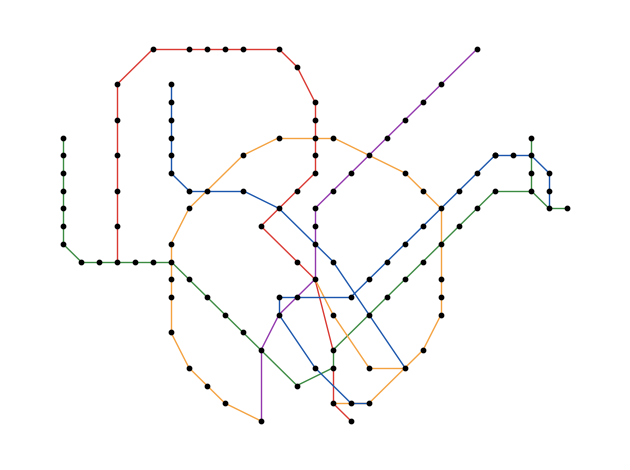

In [ ]:
train_graph = SGTrainRouteGraph()
train_graph.draw()

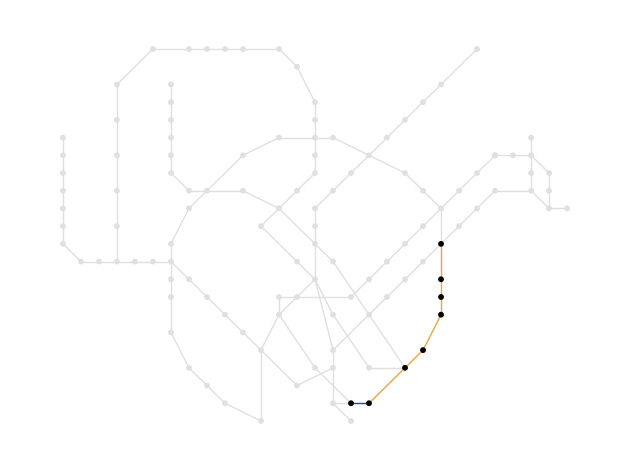

Paya Lebar
   ║
Dakota (3 min)
   ║
Mountbatten (2 min)
   ║
Stadium (2 min)
   ║
Nicoll Highway (3 min)
   ║
Promenade (3 min)
   ║
Bayfront (3 min)
   ║
Downtown (2 min)

Total travel time is 18 min


In [ ]:
train_graph.shortest_path('Paya Lebar', 'Downtown')


Route option 1


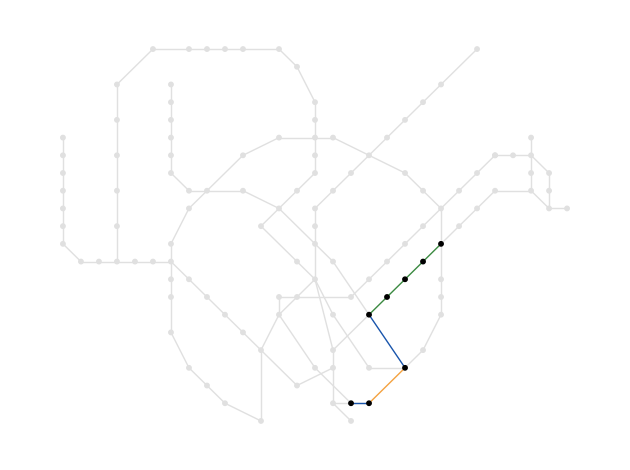

Paya Lebar
   ║
Aljunied
   ║
Kallang
   ║
Lavender
   ║
Bugis
   ║
Promenade
   ║
Bayfront
   ║
Downtown

Total travel time is 18 min


Route option 2


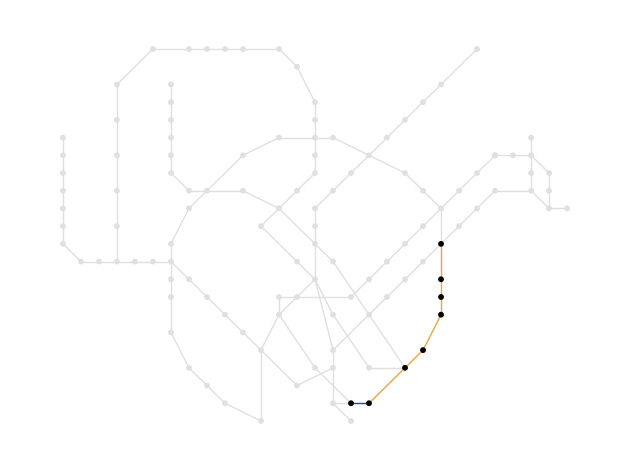

Paya Lebar
   ║
Dakota
   ║
Mountbatten
   ║
Stadium
   ║
Nicoll Highway
   ║
Promenade
   ║
Bayfront
   ║
Downtown

Total travel time is 18 min



In [ ]:
train_graph.shortest_paths('Paya Lebar', 'Downtown')

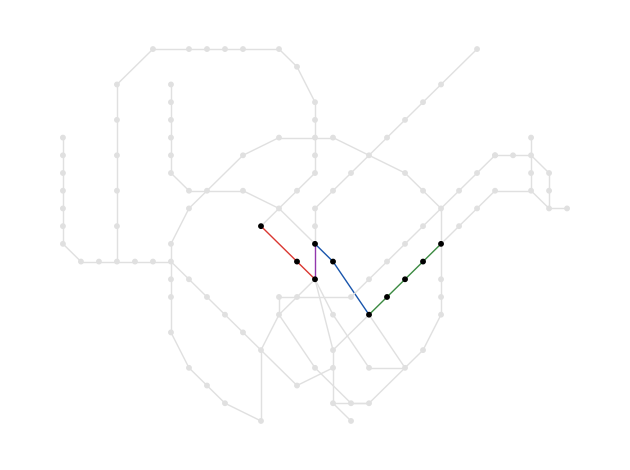

Paya Lebar
   ║
Aljunied (3 min)
   ║
Kallang (3 min)
   ║
Lavender (3 min)
   ║
Bugis (3 min)
   ║
Rochor (2 min)
   ║
Little India (1 min)
   ║
Dhoby Ghaut (1 min)
   ║
Somerset (2 min)
   ║
Orchard (3 min)

Total travel time is 21 min


In [ ]:
train_graph.shortest_path('Paya Lebar', 'Orchard')


Route option 1


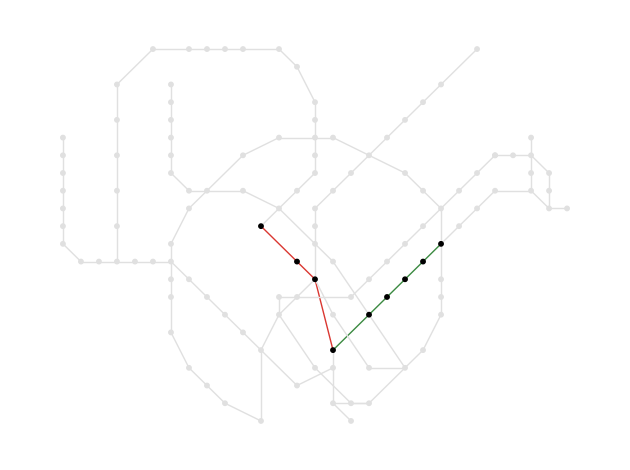

Paya Lebar
   ║
Aljunied
   ║
Kallang
   ║
Lavender
   ║
Bugis
   ║
City Hall
   ║
Dhoby Ghaut
   ║
Somerset
   ║
Orchard

Total travel time is 21 min


Route option 2


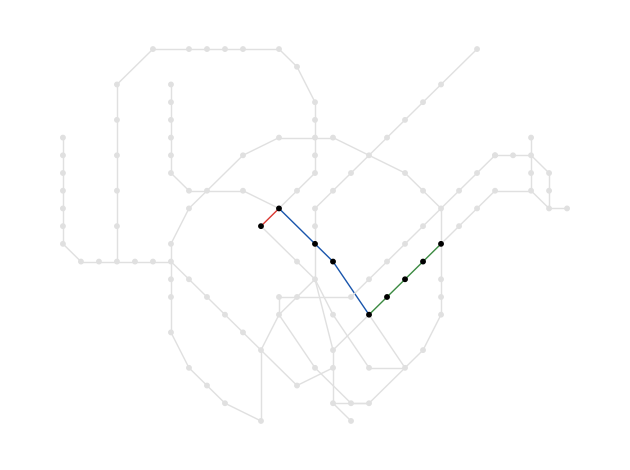

Paya Lebar
   ║
Aljunied
   ║
Kallang
   ║
Lavender
   ║
Bugis
   ║
Rochor
   ║
Little India
   ║
Newton
   ║
Orchard

Total travel time is 21 min



In [ ]:
train_graph.shortest_paths('Paya Lebar', 'Orchard')